In [4]:
import pandas as pd
import os

# List files in the data directory to check if the CSV files exist

X_train = pd.read_csv("D:\Portofolio Projects\Customer_Churn\Data\X_train.csv")
X_test = pd.read_csv("D:\Portofolio Projects\Customer_Churn\Data\X_test.csv")

y_train = pd.read_csv("D:\Portofolio Projects\Customer_Churn\Data\y_train.csv").squeeze()  # Squeeze to convert DataFrame to Series
y_test = pd.read_csv("D:\Portofolio Projects\Customer_Churn\Data\y_test.csv").squeeze()

print("Data loaded successfully!")
print("X_train shape:", X_train.shape)
print("y_train distribution:\n", y_train.value_counts())

Data loaded successfully!
X_train shape: (8262, 19)
y_train distribution:
 Churn
1    4131
0    4131
Name: count, dtype: int64


<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
<>:10: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Jagdish\AppData\Local\Temp\ipykernel_16936\2109449907.py:6: SyntaxWarning: invalid escape sequence '\P'
  X_train = pd.read_csv("D:\Portofolio Projects\Customer_Churn\Data\X_train.csv")
C:\Users\Jagdish\AppData\Local\Temp\ipykernel_16936\2109449907.py:7: SyntaxWarning: invalid escape sequence '\P'
  X_test = pd.read_csv("D:\Portofolio Projects\Customer_Churn\Data\X_test.csv")
C:\Users\Jagdish\AppData\Local\Temp\ipykernel_16936\2109449907.py:9: SyntaxWarning: invalid escape sequence '\P'
  y_train = pd.read_csv("D:\Portofolio Projects\Customer_Churn\Data\y_train.csv").squeeze()  # Sq

# Train & Evaluate Logistic Regression

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.52      0.77      0.62       372

    accuracy                           0.75      1405
   macro avg       0.71      0.76      0.72      1405
weighted avg       0.80      0.75      0.76      1405

Confusion Matrix:
 [[764 269]
 [ 84 288]]


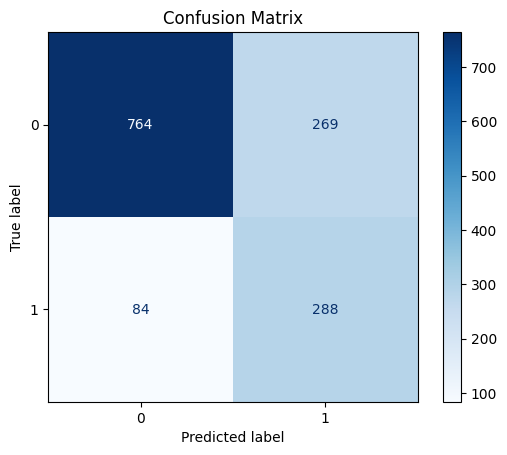

ROC AUC Score: 0.8388593094546628


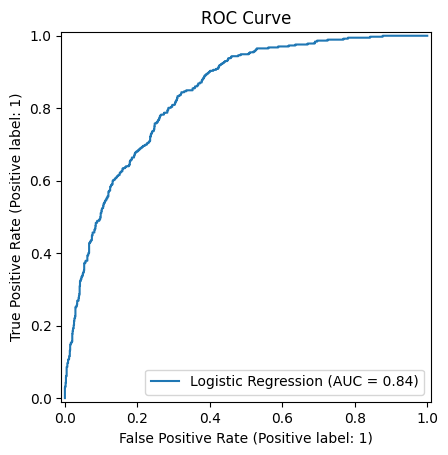

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Calculate and display ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)
# Plot ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test, name="Logistic Regression")
plt.title("ROC Curve")
plt.show()

# Train & Compare Random Forest and XGBoost

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1033
           1       0.59      0.57      0.58       372

    accuracy                           0.78      1405
   macro avg       0.72      0.71      0.72      1405
weighted avg       0.78      0.78      0.78      1405

Random Forest Confusion Matrix:
 [[886 147]
 [161 211]]


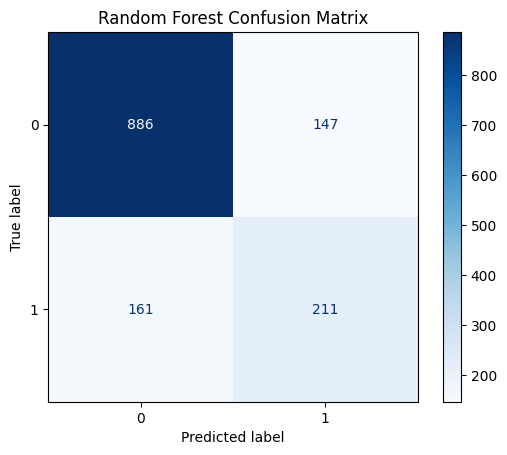

Random Forest ROC AUC Score: 0.815935681645484


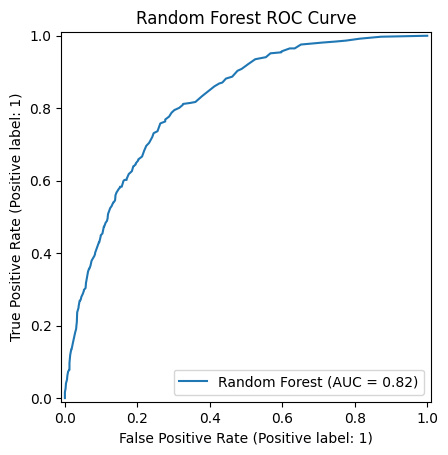

In [6]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
# Fit the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)
rf_y_proba = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate the Random Forest model
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
# Display the confusion matrix for Random Forest
rf_disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, rf_y_pred), display_labels=rf_model.classes_)
rf_disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

# Calculate and display ROC AUC score for Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_y_proba)
print("Random Forest ROC AUC Score:", rf_roc_auc)
# Plot ROC Curve for Random Forest
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name="Random Forest")
plt.title("Random Forest ROC Curve")
plt.show()

c:\Users\Jagdish\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:26:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1033
           1       0.57      0.56      0.57       372

    accuracy                           0.77      1405
   macro avg       0.71      0.70      0.71      1405
weighted avg       0.77      0.77      0.77      1405

XGBoost Confusion Matrix:
 [[875 158]
 [163 209]]


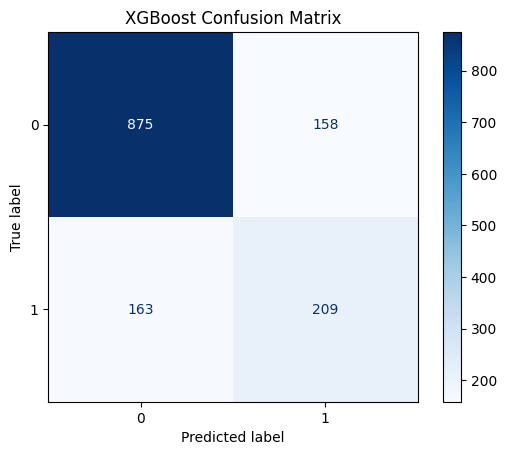

XGBoost ROC AUC Score: 0.8229566769717598


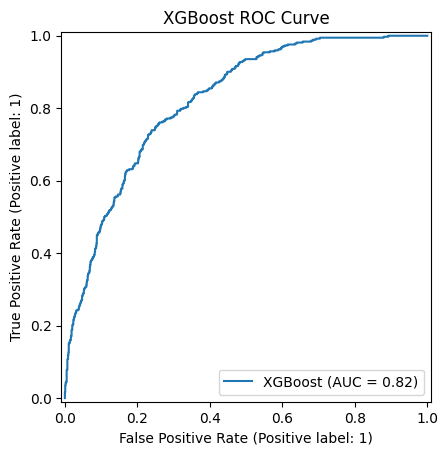

In [7]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# Fit the XGBoost model on the training data
xgb_model.fit(X_train, y_train)
# Make predictions on the test set

xgb_y_pred = xgb_model.predict(X_test)
xgb_y_proba = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate the XGBoost model
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_y_pred))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))
# Display the confusion matrix for XGBoost
xgb_disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, xgb_y_pred), display_labels=xgb_model.classes_)
xgb_disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()

# Calculate and display ROC AUC score for XGBoost
xgb_roc_auc = roc_auc_score(y_test, xgb_y_proba)
print("XGBoost ROC AUC Score:", xgb_roc_auc)
# Plot ROC Curve for XGBoost
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test, name="XGBoost")
plt.title("XGBoost ROC Curve")
plt.show()

# Comparing models

Model: logistic_regression
Accuracy: 0.7459, Precision: 0.5133, Recall: 0.7796, F1 Score: 0.6190, ROC AUC: 0.8379



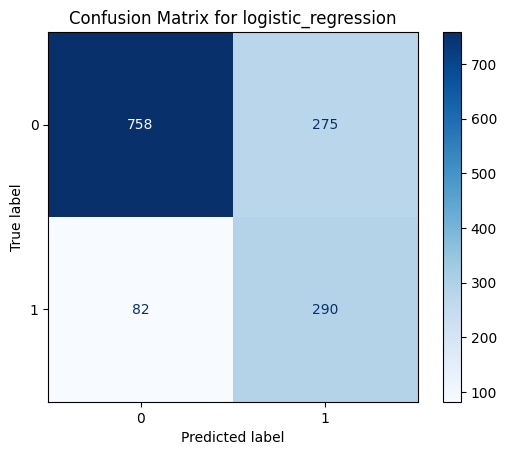

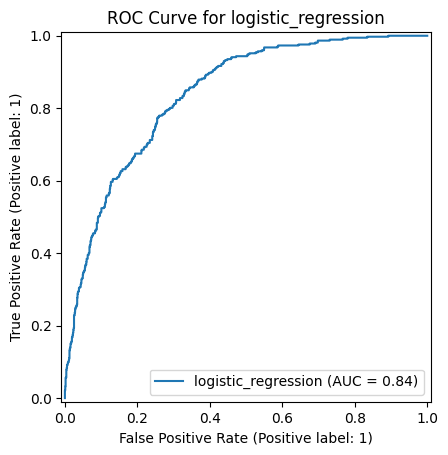

Model: random_forest
Accuracy: 0.7751, Precision: 0.5757, Recall: 0.5726, F1 Score: 0.5741, ROC AUC: 0.8179



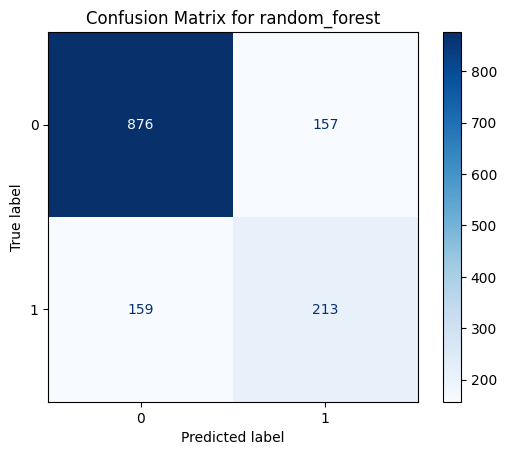

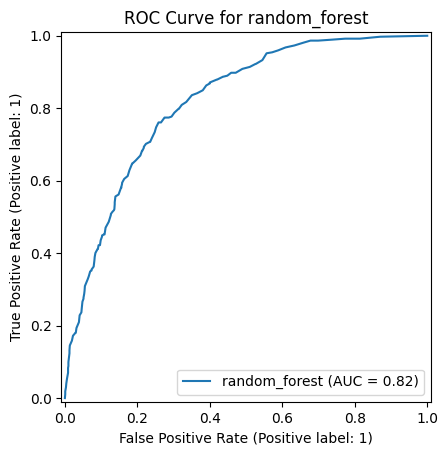

Model: decision_tree
Accuracy: 0.7125, Precision: 0.4621, Recall: 0.5242, F1 Score: 0.4912, ROC AUC: 0.6530



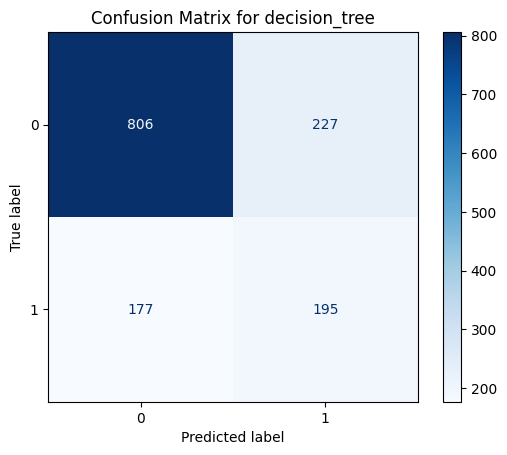

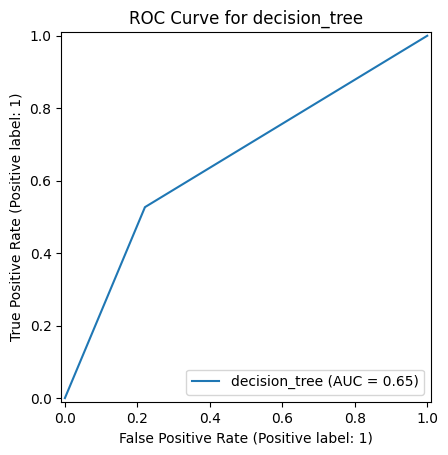

c:\Users\Jagdish\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Jagdish\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Jagdish\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Jagdish\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", l

Model: knn
Accuracy: 0.6762, Precision: 0.4319, Recall: 0.7070, F1 Score: 0.5362, ROC AUC: 0.7394



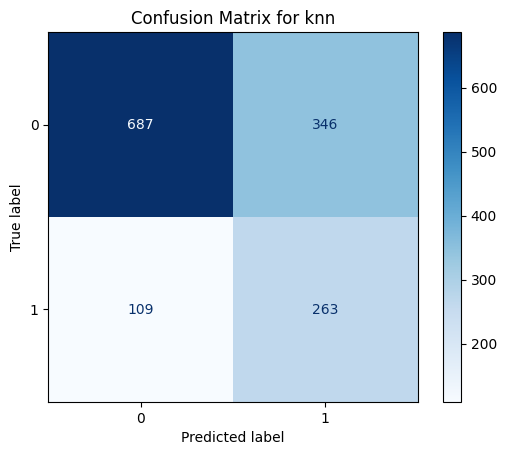

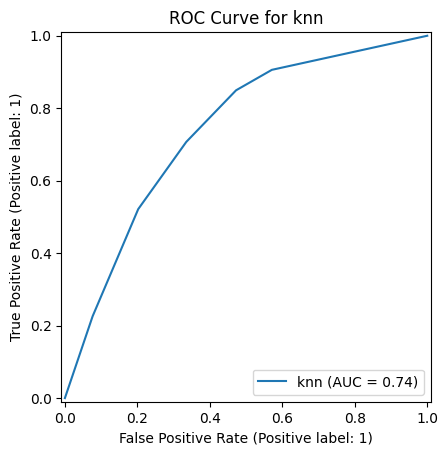

Model: xgboost
Accuracy: 0.7680, Precision: 0.5622, Recall: 0.5591, F1 Score: 0.5606, ROC AUC: 0.8132



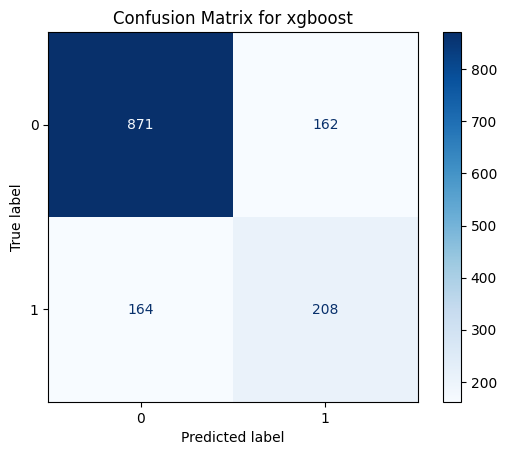

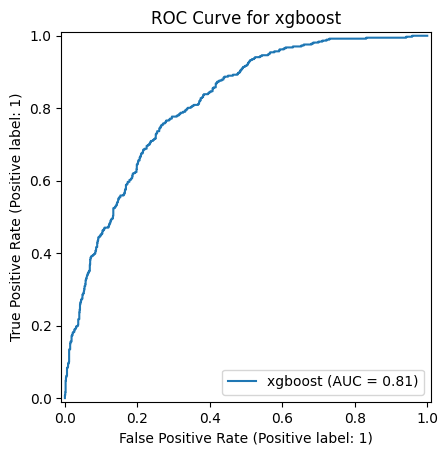

In [9]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)

# Load data
X_test = pd.read_csv("d:/Portofolio Projects/Customer_Churn/data/X_test.csv")
y_test = pd.read_csv("d:/Portofolio Projects/Customer_Churn/data/y_test.csv").values.ravel()

# Load models
model_names = ["logistic_regression", "random_forest", "decision_tree", "knn", "xgboost"]
model_dir = "d:/Portofolio Projects/Customer_Churn/models/"
models = {name: joblib.load(f"{model_dir}{name}.joblib") for name in model_names}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    results[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc
    }
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

    # ROC Curve
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name)
    plt.title(f"ROC Curve for {name}")
    plt.show()
    